In [1]:
import xpsi
from xpsi.global_imports import _c, _G, _dpr, gravradius, _csq, _km, _2pi, _keV, _k_B, _h, _h_keV, _c_cgs
k_B_over_keV = _k_B / _keV
from scipy.integrate import quad

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from custom_tools import CustomInstrumentJ1808, CustomBackground_BlackBody, CustomBackground_DiskBB, CustomInterstellar, get_T_in_log10_Kelvin, plot_2D_pulse, get_mids_from_edges, CustomSignal, SynthesiseData
from matplotlib import cm

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1


In [2]:
################################## INSTRUMENT #################################
channel_low = 20
channel_hi = 300 #600 #500 #300 commented numbers work
max_input = 1400 #2000 #1800 #1400

NICER = CustomInstrumentJ1808.from_response_files(ARF = '../model_data/J1808/ni2584010103mpu7_arf_aeff.txt',
                                                  RMF = '../model_data/J1808/ni2584010103mpu7_rmf_matrix.txt',
                                                  channel_edges = '../model_data/J1808/ni2584010103mpu7_rmf_energymap.txt',
                                                  channel_low=channel_low,
                                                  channel_hi=channel_hi,
                                                  max_input=max_input)

Setting channels for loaded instrument response (sub)matrix...
Channels set.
No parameters supplied... empty subspace created.


In [3]:
value = 1.17 # 10^21 cm^-2
interstellar = CustomInterstellar.from_SWG("/home/bas/Documents/Projects/x-psi/xpsi-bas-fork/AMXPs/model_data/n_H/TBnew/tbnew0.14.txt", bounds=(None, None), value=value)


Creating parameter:
    > Named "column_density" with bounds [1.000e-03, 2.000e+00] and initial value 1.170e+00.
    > Units of 10^21 cm^-2.


In [4]:
T_keV = 0.3 #keV #0.3 keV for Kajava+ 2011
T_log10_Kelvin = get_T_in_log10_Kelvin(T_keV)

i = 0
cos_i = np.cos(i*np.pi/180)

distance = 0.35 #  units of 10 kpc
r_in = 30 # km # 55 km for Kajava+ 2011
K_disk = cos_i*(r_in/distance)**2  # (km / 10 kpc)^2



values = {'T_in': T_log10_Kelvin,
          'K_disk': K_disk
         } 

background = CustomBackground_DiskBB(bounds=(None, None), values=values, interstellar = interstellar)

Creating parameter:
    > Named "T_in" with bounds [3.000e+00, 1.000e+01] and initial value 6.542e+00.
    > Temperature at inner disk radius in log10 Kelvin.
Creating parameter:
    > Named "K_disk" with bounds [1.000e+00, 1.000e+08] and initial value 7.347e+03.
    > Disk normalisation cos_i*R_in^2/D^2 in (km / 10 kpc)^2.


In [5]:
phases = np.linspace(0.0, 1.0, 33)

In [6]:
for i in range(phases.shape[0]):
    print(phases[i])

0.0
0.03125
0.0625
0.09375
0.125
0.15625
0.1875
0.21875
0.25
0.28125
0.3125
0.34375
0.375
0.40625
0.4375
0.46875
0.5
0.53125
0.5625
0.59375
0.625
0.65625
0.6875
0.71875
0.75
0.78125
0.8125
0.84375
0.875
0.90625
0.9375
0.96875
1.0


In [7]:
l_edges = np.logspace(np.log10(3),np.log10(200),100, base=10.)
l_mids = get_mids_from_edges(l_edges)

# Angstrom -> keV
# E = hf = hc/lambda
hc = _h_keV*_c*10**10 # keV Anstrom

pe_edges = np.flipud(hc/l_mids)  # keV


In [8]:
# background(energy_edges = pe_edges, phases=phases)
pe_mids = get_mids_from_edges(pe_edges)
# print(pe_mids)

background(energy_edges = NICER.energy_edges, phases=phases)
NICER.energy_mids = get_mids_from_edges(NICER.energy_edges)
# print(NICER.energy_mids)

/home/bas/Documents/Projects/x-psi/xpsi-bas-fork/AMXPs/Notebooks/../custom_tools.py:1491: RuntimeWarning: overflow encountered in exp
  b = 2*E**2/(_h_keV**3*_c_cgs**2)/(np.exp(E/T)-1)


In [12]:
for edge in NICER.energy_edges:
    print(edge)


0.1
0.105
0.11
0.115
0.12
0.125
0.13
0.135
0.14
0.145
0.15
0.155
0.16
0.165
0.17
0.175
0.18
0.185
0.19
0.195
0.2
0.205
0.21
0.215
0.22
0.225
0.23
0.235
0.24
0.245
0.25
0.255
0.26
0.265
0.27
0.271
0.272
0.273
0.274
0.275
0.276
0.277
0.278
0.279
0.28
0.281
0.282
0.283
0.284
0.285
0.286
0.287
0.288
0.289
0.29
0.291
0.292
0.293
0.294
0.295
0.3
0.305
0.31
0.315
0.32
0.325
0.33
0.335
0.34
0.345
0.35
0.355
0.36
0.365
0.37
0.375
0.38
0.385
0.39
0.391
0.392
0.393
0.394
0.395
0.396
0.397
0.398
0.399
0.4
0.401
0.402
0.403
0.404
0.405
0.406
0.407
0.408
0.409
0.41
0.411
0.412
0.413
0.414
0.415
0.416
0.417
0.418
0.419
0.42
0.421
0.422
0.423
0.424
0.425
0.426
0.427
0.428
0.429
0.43
0.435
0.44
0.445
0.45
0.455
0.46
0.465
0.47
0.475
0.48
0.485
0.49
0.495
0.5
0.505
0.51
0.515
0.52
0.521
0.522
0.523
0.524
0.525
0.526
0.527
0.528
0.529
0.53
0.531
0.532
0.533
0.53305
0.5331
0.53315
0.5332
0.53325
0.5333
0.53335
0.5334
0.53345
0.5335
0.53355
0.5336
0.53365
0.5337
0.53375
0.5338
0.53385
0.5339
0.53395
0.534


In [10]:
for i in range(len(phases)):
    print(background.incident_background[:,i])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07233294e-08
 4.01029209e-08 3.94927579e-08]
[0.00000000e+00 0.00000000e+00

TypeError: Dimensions of C (1400, 1000) are incompatible with X (1000) and/or Y (1400); see help(pcolormesh)

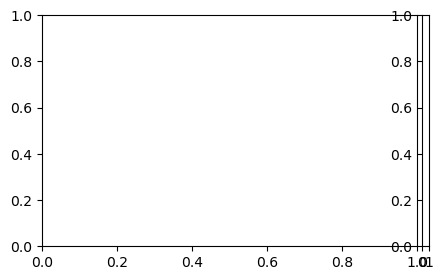

In [11]:
ax = plot_2D_pulse((background.incident_background,),
                   x=phases,
                   shift = np.array([0.]),
                   y=NICER.energy_edges[:-1], # pe_edges[:-1], # 
                   ylabel=r'Energy (keV)',
                   cm=cm.jet,
                   num_rotations=2.0,
                   normalize=False)

In [ ]:
print('incident photons/cm^2/s: ', np.sum(background.incident_background[:,0]))

In [ ]:
photonflux = np.sum(background.incident_background, axis=1)

# plt.plot(pe_mids, photonflux)
plt.plot(NICER.energy_mids, photonflux)

plt.xlabel('E keV')
plt.ylabel('photons/s/cm^2/bin')
# plt.ylabel('keV/s/cm^2')

In [ ]:
NICER.energy_mids[np.argmax(photonflux)]

In [ ]:
exposure_time = 1.36374e5  # seconds
background.incident_background *= exposure_time #photons/cm^2/bin


In [ ]:
plt.plot(NICER.energy_mids,background.incident_background[:,0])

In [ ]:
_data = SynthesiseData(np.arange(channel_low,channel_hi), phases, 0, channel_hi-channel_low-1) #Apparently some hardcoded stuff for NICER

################################## SIGNAL ###################################
signal = CustomSignal(data = _data,
                        instrument = NICER, #Instrument
                        background = background,
                        interstellar = interstellar,
                        cache = True,
                        prefix='Instrument')

In [ ]:
registered_background = NICER(signal._background.incident_background,
                              signal._input_interval_range,
                              signal._data.index_range)

In [ ]:
NICER.channel_values = get_mids_from_edges(NICER.channel_edges)

ax = plot_2D_pulse((registered_background,),
                   x=phases,
                   shift = np.array([0.]),
                   y=NICER.channel_values,  # NICER.channel_edges[:-1]
                   ylabel=r'Energy (keV)',
                   cm=cm.jet,
                   num_rotations=2.0,
                   normalize=False)

In [ ]:
expected_counts = np.sum(registered_background[:,:-1])
print(expected_counts)

In [ ]:
registered_background.shape
